In [4]:
import pandas as pd
import statistics
#from pandas_profiling import ProfileReport
# Подключение библиотек
# from pprint import pprint
# !pip install pandas-profiling
                            #Pandas-profiling — это библиотека с открытым исходным кодом, которая создаёт подробный отчёт по данным. 
                             #Pandas-profiling можно легко использовать для больших наборов данных: отчёты создаются всего за несколько секунд.
# !pip install sweetviz
# !pip install dtale
# !pip install statistics        

In [5]:
df = pd.read_csv('data/wine_cleared.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
mean = sum(df['price']) / len(df['price'])
mean

35.36338912999136

In [7]:
count_price = len(df['price']) # количество записей цен
sorted_price = sorted(df['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = sorted(x), round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0

In [8]:
mode = round(df["price"].value_counts().index[0],2)
mode

35.36

In [9]:
# df["price"].value_counts()

In [10]:
df['points'].min()

80

In [11]:
df['price'].min()

4.0

In [12]:
df['price'].mean()

35.363389129985535

In [13]:
round(statistics.mean(df['price']), 2)

35.36

In [14]:
round(statistics.median(df['price']), 2)

28.0

In [15]:
df['price'].median()

28.0

In [16]:
round(statistics.mode(df['price']), 2)

35.36

In [17]:
round(df.corr(), 6)

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


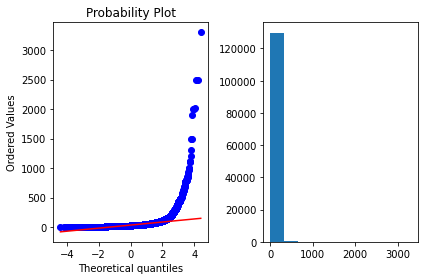

In [21]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика